<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/007_%E4%BC%98%E8%A1%A3%E5%BA%93%E9%94%80%E5%94%AE%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 背景
优衣库（英文名称：UNIQLO, 日文假名发音：二二夕口），为日本迅销公司的核心品牌，建立于1984年，当年是一家销售西服的小服装店，现已成为国际知名服装品牌。优衣库现任董事长兼总经理柳井正在日本首次引进了大卖场式的服装销售方式，通过独特的商品策划、开发和销售体系来实现店铺运作的低成本化，由此引发了优衣库的热卖潮。

该分析项目将根据优衣库的销售数据，利用Python进行可视化，并回答如下问题：


1.   整体销售情况随时间的变化是怎样的？
2.   不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式
3.   销售额和产品成本之间的关系怎么样？

# 数据各字段的含义：
Store_id： 门店随机编号id
City： 门店所在城市

Channel： 门店所产生的销售渠道，钱上表示网上购买到门店自提，线下表示门店直接购买

gender_Group： 客户性别男女

age_group: 客户年龄段

wkd_ind: 购买发生的时间（周末，周中）

Product: 产品类别

customer: 客户数量

revenue: 销售金额

Order: 订单数量（1个客人可能多次购买）

Quant: 购买的产品数量

unit_cost: 产品的成本（包含制造和营销层面）


## 一、数据清理

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-darkgrid')

#忽略报错
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from matplotlib import font_manager

--2022-04-07 12:51:45--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  62.2MB/s    in 0.2s    

2022-04-07 12:51:45 (62.2 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [ ]:
df = pd.read_csv('/content/23 L2W1-优衣库数据.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      22293 non-null  int64  
 1   city          22293 non-null  object 
 2   channel       22293 non-null  object 
 3   gender_group  22293 non-null  object 
 4   age_group     22293 non-null  object 
 5   wkd_ind       22293 non-null  object 
 6   product       22293 non-null  object 
 7   customer      22293 non-null  int64  
 8   revenue       22293 non-null  float64
 9   order         22293 non-null  int64  
 10  quant         22293 non-null  int64  
 11  unit_cost     22293 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


In [ ]:
df.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9


In [ ]:
print(df['gender_group'].value_counts())
print(df['age_group'].value_counts())

Female    14208
Male       7967
Unkown      118
Name: gender_group, dtype: int64
30-34     4426
25-29     4224
35-39     3691
20-24     3345
40-44     1955
>=60      1574
45-49     1095
50-54      672
<20        660
55-59      514
Unkown     137
Name: age_group, dtype: int64


In [ ]:
# 删除性别和年龄Unknown的行
df = df[~df['gender_group'].str.contains('Unkown') ]
df = df[~df['age_group'].str.contains('Unkown') ]

In [ ]:
df.isnull().sum()

store_id        0
city            0
channel         0
gender_group    0
age_group       0
wkd_ind         0
product         0
customer        0
revenue         0
order           0
quant           0
unit_cost       0
dtype: int64

In [ ]:
df.describe()

,store_id,customer,revenue,order,quant,unit_cost
count,22154.000000,22154.000000,22154.000000,22154.000000,22154.000000,22154.000000
mean,335.487948,1.633114,159.973413,1.655728,1.862553,46.141825
std,230.307319,1.790498,277.025601,1.866550,2.353709,19.126433
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000
25%,142.000000,1.000000,65.307500,1.000000,1.000000,49.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000
75%,480.000000,2.000000,176.000000,2.000000,2.000000,49.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000


In [ ]:
# 异常值处理-删除revenue负值数据
df[df['revenue']<0]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
20049,91,武汉,线上,Female,55-59,Weekday,运动,1,-0.66,1,2,49


In [ ]:
df = df.drop(df[df['revenue']<0].index)

In [ ]:
df.describe()

,store_id,customer,revenue,order,quant,unit_cost
count,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000
mean,335.498984,1.633142,159.980664,1.655758,1.862547,46.141696
std,230.306659,1.790534,277.029751,1.866587,2.353762,19.126855
min,19.000000,1.000000,0.000000,1.000000,1.000000,9.000000
25%,142.000000,1.000000,65.510000,1.000000,1.000000,49.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000
75%,480.000000,2.000000,176.000000,2.000000,2.000000,49.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000


## 二、 数据分析

### 1. 单变量分析

**（1） city**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

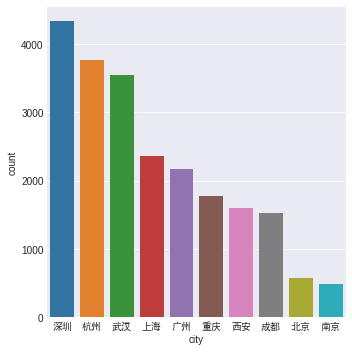

In [ ]:
# count of city
df_count_city = df.city.value_counts().reset_index()
# 更改列名
df_count_city = df_count_city.rename(columns = {'index':'city','city':'count'})

sns.catplot(x='city',y='count',data=df_count_city,kind='bar')
plt.xticks(fontproperties=zhfont)

* 客户下单主要集中于深圳、杭州、武汉等一线、新一线城市

**（2） Channel**


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

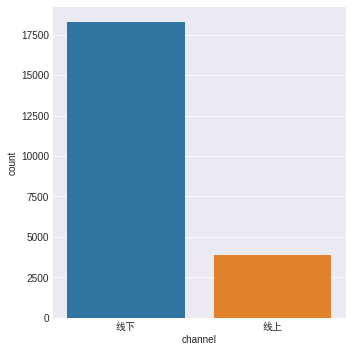

In [ ]:
df_count_channel = df['channel'].value_counts().reset_index()
df_count_channel = df_count_channel.rename(columns={'index':'channel','channel':'count'})

sns.catplot(x='channel',y='count',data=df_count_channel,kind='bar')
plt.xticks(fontproperties=zhfont)

* 客户主要在线下购买产品

**（3） gender_group**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

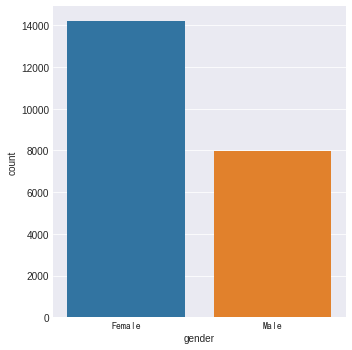

In [ ]:
df_count_gender = df['gender_group'].value_counts().reset_index()
df_count_gender = df_count_gender.rename(columns={'index':'gender','gender_group':'count'})

sns.catplot(x='gender',y='count',data=df_count_gender,kind='bar')
plt.xticks(fontproperties=zhfont)

* 客户群体主要为女性

**（4） age_group**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

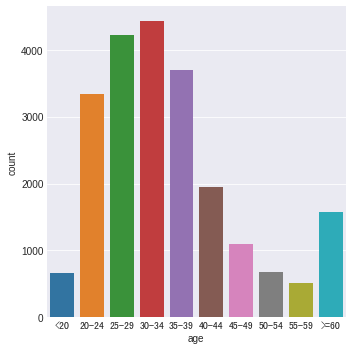

In [ ]:
df_count_age = df['age_group'].value_counts().reset_index()
df_count_age = df_count_age.rename(columns={'index':'age','age_group':'count'})

age_orders = ['<20','20-24','25-29',  '30-34','35-39',  '40-44','45-49', '50-54','55-59','>=60']

sns.catplot(x='age',y='count',data=df_count_age,kind='bar',order=age_orders)
plt.xticks(fontproperties=zhfont)

* 购买人群年龄主要在20到39岁之间

**（5） wkd_ind**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

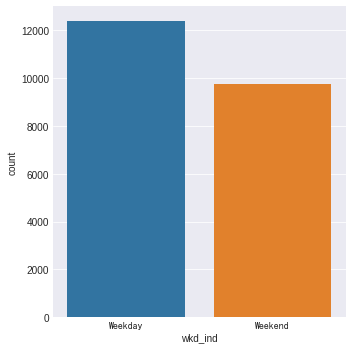

In [ ]:
df_count_wkd = df['wkd_ind'].value_counts().reset_index()
df_count_wkd = df_count_wkd.rename(columns={'index':'wkd_ind','wkd_ind':'count'})

sns.catplot(x='wkd_ind',y='count',data=df_count_wkd,kind='bar')
plt.xticks(fontproperties=zhfont)

* 客户平时下单数量是最多的

### 2. 数值型变量

**（1） revenue**

In [ ]:
df['revenue'].describe()

count    22153.000000
mean       159.980664
std        277.029751
min          0.000000
25%         65.510000
50%         99.000000
75%        176.000000
max      12538.000000
Name: revenue, dtype: float64

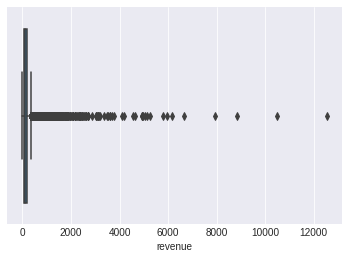

In [ ]:
sns.boxplot(df.revenue)

In [ ]:
bins = [0,100,200,300,500,1000,2000,4000,6000,13000]
df['revenue_new'] = pd.cut(df['revenue'],bins,right=False)
df.groupby(['revenue_new'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
revenue_new,,,,,,,,
"[0, 100)",13623.0,69.430846,24.057158,0.00,54.0000,79.0,92.0000,99.0
"[100, 200)",4943.0,163.856476,29.291676,100.00,149.0000,158.0,198.0000,199.0
"[200, 300)",1441.0,263.889806,29.416385,201.00,237.0000,257.0,297.0000,299.0
"[300, 500)",1251.0,398.399361,55.740078,300.82,348.0000,396.0,447.0000,498.0
"[500, 1000)",671.0,684.615633,134.712670,505.00,592.0000,643.0,780.7500,997.0
"[1000, 2000)",162.0,1358.550617,257.825041,1009.00,1155.2500,1293.0,1541.2500,1990.0
"[2000, 4000)",44.0,2684.032727,510.902349,2050.00,2285.5725,2560.0,3083.5425,3778.0
"[4000, 6000)",12.0,4954.405000,549.981880,4110.00,4623.7100,4960.5,5151.8575,5947.0
"[6000, 13000)",6.0,8762.880000,2422.039826,6150.00,6956.7500,8377.5,10082.7100,12538.0


* 销售额主要集中分布在1000元以下，高额订单较少

### 3. 增加衍生变量

* 人均订单量=order/customer
* 人均购买商品量=quant/customer
* 人均消费额=revenue/customer
* 商品平均销售额=revenue/quant
* 利润=商品平均销售额-unit_cost

In [ ]:
df['unit_order_num']=df['order']/df['customer']
df['unit_quant_num']=df['quant']/df['customer']
df['unit_revenue']=df['revenue']/df['customer']
df['unit_revenue_of_product']=round(df['revenue']/df['quant'],1)
df['profit']=round(df['unit_revenue_of_product']-df['unit_cost'],1)

In [ ]:
df.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_new,unit_order_num,unit_quant_num,unit_revenue,unit_revenue_of_product,profit
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,"[500, 1000)",1.0,1.0,199.0,199.0,140.0
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,"[100, 200)",1.0,1.0,149.0,149.0,100.0
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,"[100, 200)",1.0,1.0,89.0,89.0,40.0
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,"[0, 100)",1.0,1.0,59.0,59.0,10.0
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,"[0, 100)",1.0,1.5,32.5,21.7,12.7


In [ ]:
df.describe()

,store_id,customer,revenue,order,quant,unit_cost,unit_order_num,unit_quant_num,unit_revenue,unit_revenue_of_product,profit
count,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000,22153.000000
mean,335.498984,1.633142,159.980664,1.655758,1.862547,46.141696,1.011594,1.132359,93.308863,84.302424,38.160728
std,230.306659,1.790534,277.029751,1.866587,2.353762,19.126855,0.112301,0.740642,76.764955,46.315781,40.236577
min,19.000000,1.000000,0.000000,1.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,-99.000000
25%,142.000000,1.000000,65.510000,1.000000,1.000000,49.000000,1.000000,1.000000,59.000000,56.000000,14.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,1.000000,1.000000,79.000000,79.000000,30.000000
75%,480.000000,2.000000,176.000000,2.000000,2.000000,49.000000,1.000000,1.000000,99.000000,99.000000,50.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,5.500000,84.000000,6636.000000,299.000000,270.000000


### 4. 多变量分析

In [ ]:
df.groupby(['city'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
上海,2366.0,163.709100,259.619885,18.0,72.0,99.0,197.0,6636.00
北京,576.0,226.353507,282.532186,19.0,79.0,118.5,237.0,2579.00
南京,494.0,248.491761,668.730288,18.0,79.0,99.0,199.0,12538.00
广州,2174.0,145.626260,163.886532,0.0,59.0,99.0,158.0,2081.00
成都,1521.0,136.393728,216.879250,10.0,59.0,94.0,149.0,6150.00
杭州,3764.0,156.229673,288.262277,10.0,59.0,99.0,158.0,8836.00
武汉,3550.0,165.624913,286.349161,18.0,73.0,99.0,158.0,7919.00
深圳,4331.0,168.696795,282.010164,10.0,75.0,99.0,191.5,5947.00
西安,1603.0,131.345365,139.304151,0.0,59.0,93.0,158.0,1743.00


In [ ]:
df.groupby(['channel'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
channel,,,,,,,,
线上,3859.0,168.435123,241.588386,10.0,69.115,99.0,198.0,5039.59
线下,18294.0,158.197251,283.915269,0.0,63.450,99.0,158.0,12538.00


In [ ]:
df.groupby(['gender_group'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
gender_group,,,,,,,,
Female,14196.0,177.983235,329.951849,0.0,73.0,99.0,198.0,12538.0
Male,7957.0,127.862467,133.537000,0.0,59.0,96.5,149.0,1972.0


In [ ]:
df.groupby(['age_group'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
20-24,3345.0,165.049151,239.990281,0.0,75.0,99.00,198.0000,5039.59
25-29,4224.0,185.470419,352.358196,0.0,78.0,99.00,198.0000,8836.00
30-34,4426.0,176.660045,278.626585,0.0,65.0,99.00,198.0000,6150.00
35-39,3690.0,157.323501,282.521420,0.0,59.0,99.00,174.0075,10498.28
40-44,1954.0,124.016796,152.839671,0.0,59.0,79.00,149.0000,2475.00
45-49,1095.0,138.654219,401.381628,0.0,59.0,92.96,149.0000,12538.00
50-54,672.0,146.992009,307.393782,0.0,59.0,99.00,149.0000,6636.00
55-59,513.0,137.634308,167.705366,10.0,59.0,79.00,158.0000,2425.00
<20,660.0,122.922318,105.291419,0.0,79.0,99.00,149.0000,1023.00


In [ ]:
df.groupby(['product'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
T恤,10549.0,145.285902,154.628961,0.0,79.0,99.0,158.00,6636.00
当季新品,2531.0,233.071861,598.244888,0.0,76.0,111.0,197.00,12538.00
毛衣,805.0,304.637019,291.036335,0.0,149.0,199.0,396.00,4975.00
牛仔裤,1396.0,175.404355,239.774504,0.0,59.0,79.0,199.00,2087.00
短裤,1681.0,63.631695,55.814157,0.0,37.0,40.0,77.57,676.00
袜子,2040.0,62.320275,51.284818,0.0,27.0,52.0,79.00,595.36
裙子,629.0,218.287409,172.449212,10.0,99.0,197.0,237.00,1442.00
运动,969.0,121.220165,143.116946,18.0,39.0,78.0,149.00,1257.00
配件,1553.0,284.974340,400.616860,0.0,99.0,155.0,298.00,4187.00


根据营业收入进行分析，可知：
* 南京、北京平均订单收入是最高的两个城市；
* 女性消费金额高于男性；
* 购买产品的主要群体是20到39岁之间；
* 销售量最好的类型是T恤。

## 三、数据可视化

### 问题1 ： 整体销售情况随着时间的变化是怎样的？

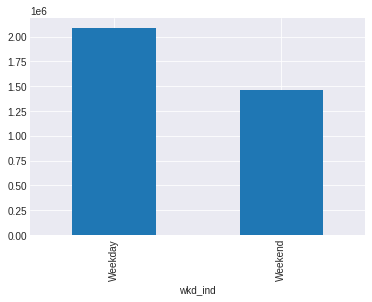

In [ ]:
# revenue
ax1 = df.groupby(['wkd_ind'])['revenue'].sum().plot(kind='bar')

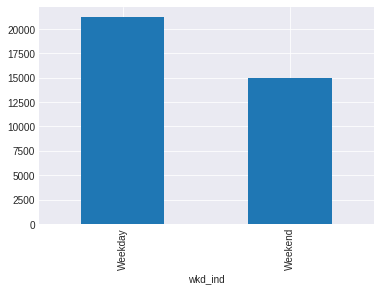

In [ ]:
# customer
ax2 = df.groupby(['wkd_ind'])['customer'].sum().plot(kind='bar')

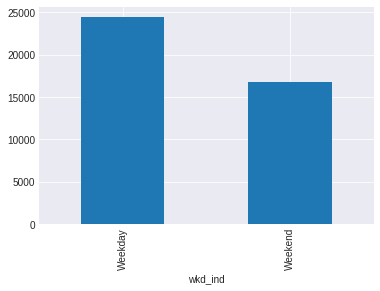

In [ ]:
# quantity
ax3 = df.groupby(['wkd_ind'])['quant'].sum().plot(kind='bar')

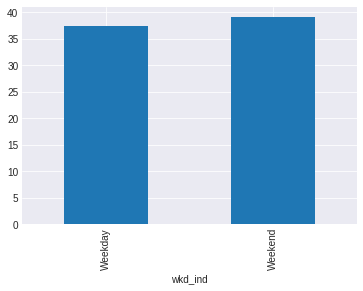

In [ ]:
# profit
ax4 = df.groupby(['wkd_ind'])['profit'].mean().plot(kind='bar')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

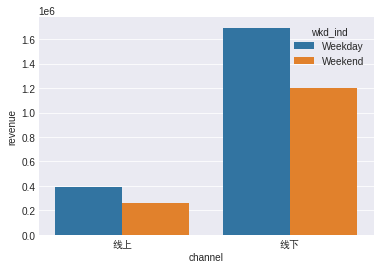

In [ ]:
# channel - revenue
df1 = df.groupby(['wkd_ind','channel'])['revenue'].sum().reset_index()
sns.barplot(x='channel',y='revenue',hue='wkd_ind',data=df1)
plt.xticks(fontproperties=zhfont)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

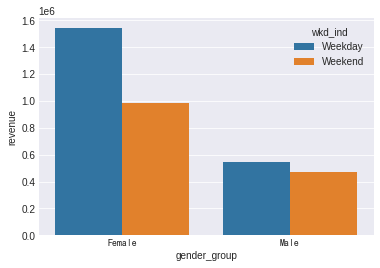

In [ ]:
# gender - revenue
df2 = df.groupby(['wkd_ind','gender_group'])['revenue'].sum().reset_index()
sns.barplot(x='gender_group',y='revenue',hue='wkd_ind',data=df2)
plt.xticks(fontproperties=zhfont)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

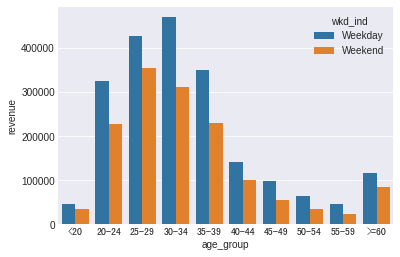

In [ ]:
# Age - revenue
df3 = df.groupby(['wkd_ind','age_group'])['revenue'].sum().reset_index()
sns.barplot(x='age_group',y='revenue',hue='wkd_ind',data=df3,order=age_orders)
plt.xticks(fontproperties=zhfont)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

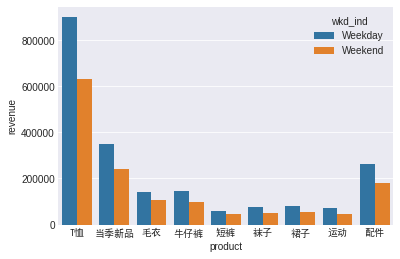

In [ ]:
# Product - revenue
df4 = df.groupby(['wkd_ind','product'])['revenue'].sum().reset_index()
sns.barplot(x='product',y='revenue',hue='wkd_ind',data=df4)
plt.xticks(fontproperties=zhfont)

* 就销售额、顾客数量、销售量来看，平时都比周末销售情况好；但是周末的平均利润大于平时；
* 无论从线上、线下渠道，男女性别、不同阶段年龄的客户及不同产品来看，平时都比周末销售表现好。

### 问题2： 不同产品的销售情况是怎样的？

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

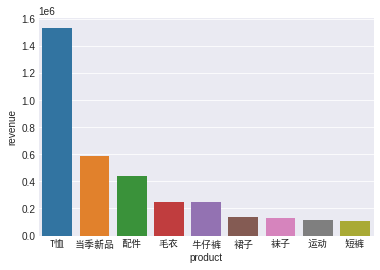

In [ ]:
#产品-销售额
df_product_revenue=df.groupby('product')['revenue'].sum().reset_index()
#排序
order_revenue=df.groupby('product').revenue.sum().sort_values(ascending=False).index
#可视化
sns.barplot(x='product',y='revenue',data=df_product_revenue,order=order_revenue)
plt.xticks(fontproperties=zhfont)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

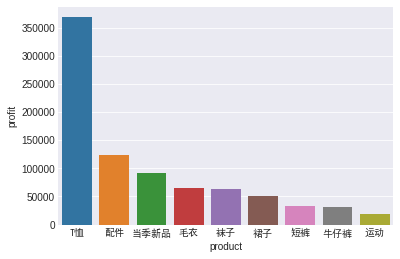

In [ ]:
#产品-利润
df_product_profit=df.groupby('product')['profit'].sum().reset_index()
#排序
order_profit=df.groupby('product').profit.sum().sort_values(ascending=False).index
#可视化
sns.barplot(x='product',y='profit',data=df_product_profit,order=order_profit)
plt.xticks(fontproperties=zhfont)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

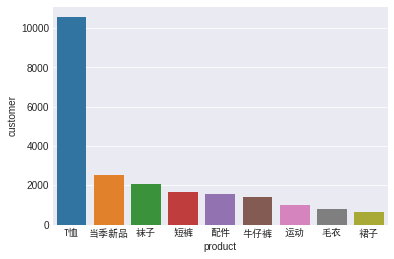

In [ ]:
#产品-客户数
df_product_customer=df.groupby('product')['customer'].count().reset_index()
#排序
order_customer=df.groupby('product').customer.count().sort_values(ascending=False).index
#可视化
sns.barplot(x='product',y='customer',data=df_product_customer,order=order_customer)
plt.xticks(fontproperties=zhfont)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

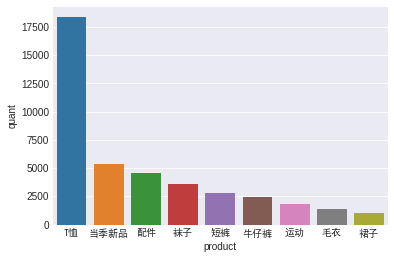

In [ ]:
#产品-销量
df_product_quant=df.groupby('product')['quant'].sum().reset_index()
#排序
order_quant=df.groupby('product').quant.sum().sort_values(ascending=False).index
#可视化
sns.barplot(x='product',y='quant',data=df_product_quant,order=order_quant)
plt.xticks(fontproperties=zhfont)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

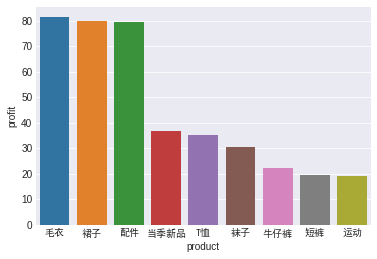

In [ ]:
#产品-平均利润
df_product_profit_2=df.groupby('product')['profit'].mean().reset_index()
#排序
order_profit_mean=df.groupby('product').profit.mean().sort_values(ascending=False).index
#可视化
sns.barplot(x='product',y='profit',data=df_product_profit_2,order=order_profit_mean)
plt.xticks(fontproperties=zhfont)

* 无论销售额、销量还是总利润，T恤都是热销第一，并远超其他类别的产品；当季新品和配件居于二、三位，但配件的利润高于当季新品；
* 根据平均利润分析图可知，毛衣、裙子、配件接近于80，利润是最高的。

### 问题3： 顾客偏爱哪一种购买方式？

Text(0.5, 1.0, '不同城市人群的购买渠道偏好')

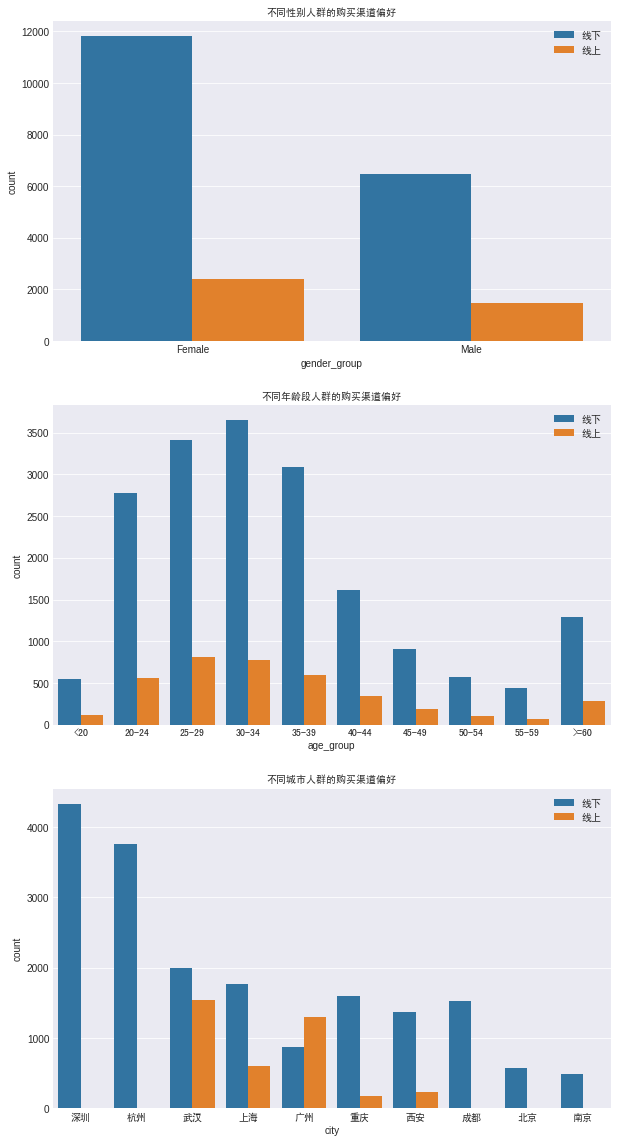

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.countplot(x='gender_group',hue='channel',data=df,
              order=df['gender_group'].value_counts().index)
plt.legend(prop=zhfont,loc='upper right')
plt.title("不同性别人群的购买渠道偏好",fontproperties=zhfont)

plt.subplot(3,1,2)
age_orders = ['<20','20-24','25-29',  '30-34','35-39',  '40-44','45-49', '50-54','55-59','>=60']
sns.countplot(x='age_group',hue='channel',data=df,
              order=age_orders)
plt.legend(prop=zhfont,loc='upper right')
plt.xticks(fontproperties=zhfont)
plt.title("不同年龄段人群的购买渠道偏好",fontproperties=zhfont)

plt.subplot(3,1,3)
sns.countplot(x='city',hue='channel',data=df,
              order=df['city'].value_counts().index)
plt.legend(prop=zhfont,loc='upper right')
plt.xticks(fontproperties=zhfont)
plt.title("不同城市人群的购买渠道偏好",fontproperties=zhfont)

* 广州的顾客更偏爱在线上购买，上海、西安和重庆也有一定的线上购买比例，其余城市均为在线下购买；
* 无论男女，在购买渠道的选择上都偏爱线下购买；
* 就年龄段来看，客户集中于20-39岁中青年团体，且大都选择线下购买

### 问题4：销售额和产品成本之间的关系怎么样？

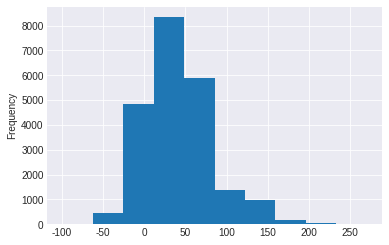

In [ ]:
df['profit'].plot(kind='hist')

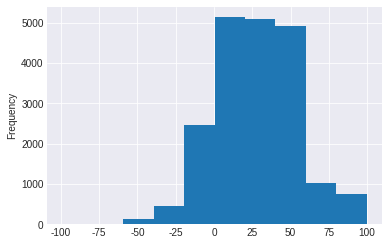

In [ ]:
#利润分布较大，进一步探索<100的利润分布
df_3=df[df['profit']<100]
df_3['profit'].plot(kind='hist')

* 存在亏本销售的产品；
* 利润大多集中[0-100]

In [ ]:
#查看亏本产品数据
df_loss=df[df['profit']<0]
df_loss.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_new,unit_order_num,unit_quant_num,unit_revenue,unit_revenue_of_product,profit
8,649,杭州,线下,Female,30-34,Weekend,牛仔裤,3,157.0,3,3,69,"[100, 200)",1.0,1.000000,52.333333,52.3,-16.7
19,658,深圳,线下,Female,35-39,Weekday,牛仔裤,3,196.0,3,4,69,"[100, 200)",1.0,1.333333,65.333333,49.0,-20.0
20,420,广州,线上,Male,>=60,Weekday,T恤,1,39.0,1,1,49,"[0, 100)",1.0,1.000000,39.000000,39.0,-10.0
23,19,南京,线下,Female,35-39,Weekend,T恤,4,176.0,4,4,49,"[100, 200)",1.0,1.000000,44.000000,44.0,-5.0
24,231,广州,线下,Female,35-39,Weekend,T恤,3,114.0,3,3,49,"[100, 200)",1.0,1.000000,38.000000,38.0,-11.0


In [ ]:
#亏本产品的城市分布
loss_count_city=df_loss.city.value_counts().reset_index()
#整体的城市的城市分布
df_count_city=df.city.value_counts().reset_index()
loss_rate = df_loss.city.value_counts()/df.city.value_counts()
loss_rate.sort_values()

北京    0.079861
南京    0.089069
武汉    0.112676
深圳    0.117756
杭州    0.126461
上海    0.128910
西安    0.139738
重庆    0.142052
广州    0.143974
成都    0.147929
Name: city, dtype: float64

* 有10个城市出现亏本产品的现象，其中成都、广州、重庆和西安都有14%左右的亏本商品。

In [ ]:
#亏本产品的渠道分布
loss_count_channel=df_loss.channel.value_counts().reset_index()
#整体的渠道分布
df_count_channel=df.channel.value_counts().reset_index()

loss_rate_channel = df_loss.channel.value_counts()/df.channel.value_counts()
loss_rate_channel.sort_values()

线上    0.107023
线下    0.130207
Name: channel, dtype: float64

* 线下约有13%亏本商品，线上约有11%亏本商品

In [ ]:
#亏本产品的下单时间分布
loss_count_wkd_ind=df_loss.wkd_ind.value_counts().reset_index()
#整体的下单时间分布
df_count_wkd_ind=df.wkd_ind.value_counts().reset_index()

loss_rate_wkd_ind = df_loss.wkd_ind.value_counts()/df.wkd_ind.value_counts()
loss_rate_wkd_ind.sort_values()

Weekend    0.120242
Weekday    0.130846
Name: wkd_ind, dtype: float64



*   平时销售约有13%的商品亏损，周末约有12%亏损


In [ ]:
#亏本产品分布
loss_count_product=df_loss.groupby('product')['quant'].sum().reset_index()
#整体的产品分布
df_count_product=df.groupby('product')['quant'].sum().reset_index()

loss_rate_product = df_loss.groupby('product')['quant'].sum()/df.groupby('product')['quant'].sum()
loss_rate_product.sort_values()

product
配件      0.000217
袜子      0.001379
短裤      0.001426
裙子      0.020101
毛衣      0.022895
T恤      0.090904
当季新品    0.199662
牛仔裤     0.511801
运动      0.623180
Name: quant, dtype: float64

* 运动亏本产品达到62%
* 牛仔裤亏本占51%
* 当季新品约有20%亏本
* T恤亏本为9%
* 其余产品无亏本。

In [ ]:
heat = df[['unit_revenue_of_product','unit_cost','profit']].corr()
heat

,unit_revenue_of_product,unit_cost,profit
unit_revenue_of_product,1.000000,0.503460,0.911762
unit_cost,0.503460,1.000000,0.104167
profit,0.911762,0.104167,1.000000


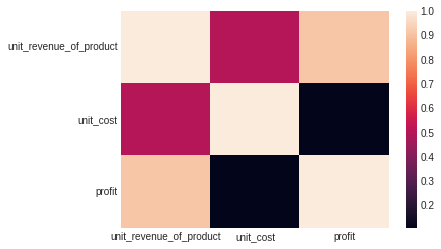

In [ ]:
sns.heatmap(heat)

* 整体来看，单位商品的销售额与成本之间是成正相关的，相关系数为0.5；
* 单位商品的销售额与利润成强正相关，相关系数为0.91；
* 但商品的成本与利润的相关性很低，仅为0.1。

## 四、分析结论

### （一）总结

**整体销售情况：**

* 客户下单集中于深圳、杭州、武汉等一线、新一线城市；
* 客户主要于线下下单；
* 主要消费群体为女性；
* 购买的主要人群为[20-39]岁；
* 客户周内比周末购买更高；
* T恤销售表现一骑绝尘，当季新品和配件销售表现也比较好。

**问题1 ： 整体销售情况随着时间的变化是怎样的？**

* 就销售额、顾客数量、销售量来看，平时都比周末销售情况好；但是周末的平均利润大于平时
* 无论从线上、线下渠道，男女性别、不同阶段年龄的客户及不同产品来看，平时都比周末销售表现好

**销售建议**

建议平时多做活动及宣传

**问题2：不同产品的销售情况是怎样的？**

* 无论就销售额、销量还是利润，T恤都是一骑绝尘；当季新品和配件居于二、三位，且配件的利润高于当季新品
* 就平均利润，毛衣、裙子、配件接近于80，利润较高

**销售建议**
* 多上架T恤、当季新品及配件产品；
* 把高利润的毛衣、裙子、配件放在显眼位置；

**问题3： 顾客偏爱哪一种购买方式**

* 广州的顾客更偏爱在线上购买，上海、西安和重庆也有一定的线上购买比例，其余城市均为在线下购买；
* 无论男女，在购买渠道的选择上都偏爱线下购买；
* 就年龄段来看，客户集中于20-39岁中青年团体，且大都选择线下购买

**销售建议**
* 广州多做线上活动宣传，其余城市把营销重点落在门店；
* 集中于中青年群体做营销广告活动

**问题4 ：销售额和产品成本之间的关系怎么样？**

* 成都、广州、重庆和西安都有14%左右的亏本商品;
* 线下约有13%亏本商品，线上约有11%亏本商品;
* 平时销售约有13%的商品亏损，周末约有12%亏损;
* 运动亏本产品达到62%，牛仔裤亏本占51%，当季新品约有20%亏本，T恤亏本为9%，其余产品无亏本；
* 单位商品的销售额与成本之间是成正相关的，相关系数为0.5；单位商品的销售额与利润成强正相关，相关系数为0.91；但商品的成本与利润的相关性很低，仅为0.1。

**销售建议**
* 对亏本严重的运动、牛仔裤等产品进入深入分析，探索价格及营销策略；
* 多销售变现不俗的T恤，及时上新新品，多多研发配件产品。